In [1]:
!pip install --upgrade scikit-learn statsmodels mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
!pip install --upgrade statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [4]:
raw = pd.read_csv('/content/EURUSD_D1.csv')

In [5]:
raw.head()

,Time,Open,High,Low,Close,Volume
0,27/08/2008 0:00,1.47356,1.47438,1.46625,1.47430,351296
1,28/08/2008 0:00,1.47462,1.48103,1.46691,1.47013,866737
2,29/08/2008 0:00,1.47026,1.47674,1.46368,1.46714,828348
3,31/08/2008 0:00,1.46748,1.47198,1.46748,1.46967,33247
4,01/09/2008 0:00,1.46962,1.47029,1.45543,1.45810,864080


In [6]:
raw.describe()

,Open,High,Low,Close,Volume
count,5014.000000,5014.000000,5014.000000,5014.000000,5.014000e+03
mean,1.208638,1.213090,1.204215,1.208601,2.185290e+05
std,0.123327,0.124223,0.122311,0.123274,2.092741e+05
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00
25%,1.104442,1.108375,1.101107,1.104470,8.066250e+04
50%,1.177365,1.180515,1.173950,1.177410,1.878390e+05
75%,1.317183,1.321785,1.311047,1.317200,2.614745e+05
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06


In [7]:
raw['Time'] = pd.to_datetime(raw['Time'], dayfirst=True)

raw.set_index('Time', inplace=True)

df = raw.resample('D').mean()
df.fillna(method='ffill', inplace=True)

df.index.freq = 'D'

<ipython-input-7-b406188d3c70>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
df.index.freq

<Day>

In [9]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2008-08-27,1.47356,1.47438,1.46625,1.47430,351296.0
2008-08-28,1.47462,1.48103,1.46691,1.47013,866737.0
2008-08-29,1.47026,1.47674,1.46368,1.46714,828348.0
2008-08-30,1.47026,1.47674,1.46368,1.46714,828348.0
2008-08-31,1.46748,1.47198,1.46748,1.46967,33247.0
...,...,...,...,...,...
2024-09-01,1.10462,1.10496,1.10440,1.10446,8177.0
2024-09-02,1.10445,1.10773,1.10419,1.10670,133709.0
2024-09-03,1.10671,1.10702,1.10263,1.10485,254603.0


In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,5854.000000,5854.000000,5854.000000,5854.000000,5.854000e+03
mean,1.208646,1.213157,1.204074,1.208545,2.230076e+05
std,0.123300,0.124201,0.122265,0.123258,2.072771e+05
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00
25%,1.104637,1.108400,1.101107,1.104300,8.350950e+04
50%,1.177450,1.180570,1.174125,1.177335,1.899620e+05
75%,1.317183,1.321835,1.311047,1.317295,2.623120e+05
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5854 entries, 2008-08-27 to 2024-09-05
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5854 non-null   float64
 1   High    5854 non-null   float64
 2   Low     5854 non-null   float64
 3   Close   5854 non-null   float64
 4   Volume  5854 non-null   float64
dtypes: float64(5)
memory usage: 274.4 KB


In [12]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [13]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


## Visualization

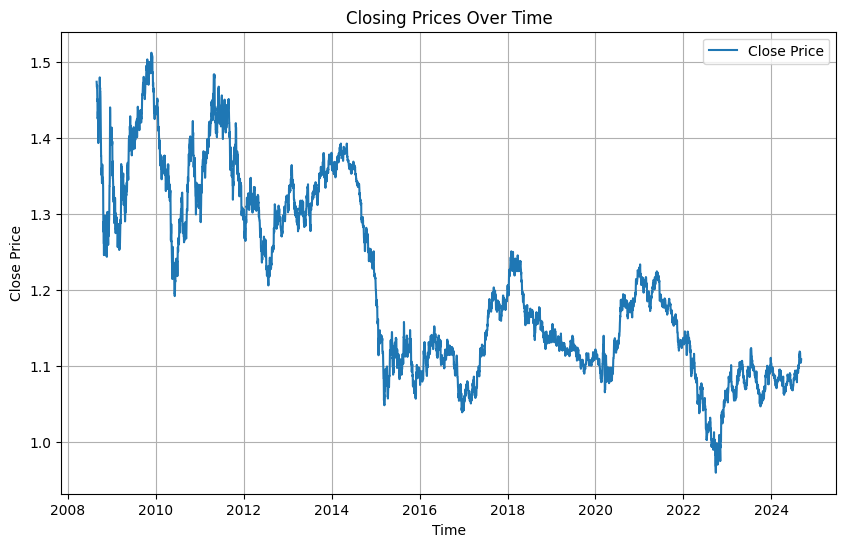

In [14]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

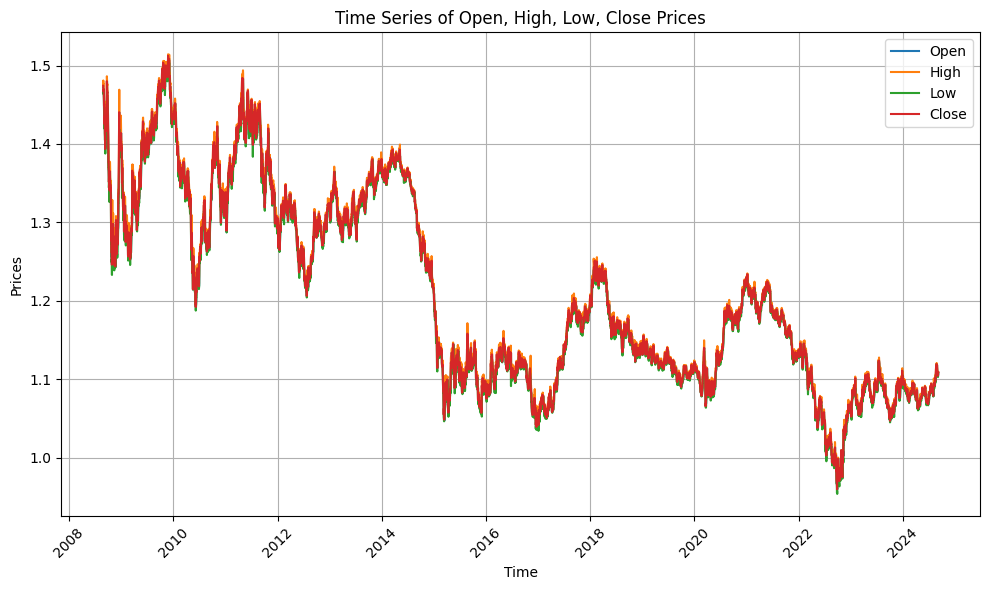

In [15]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


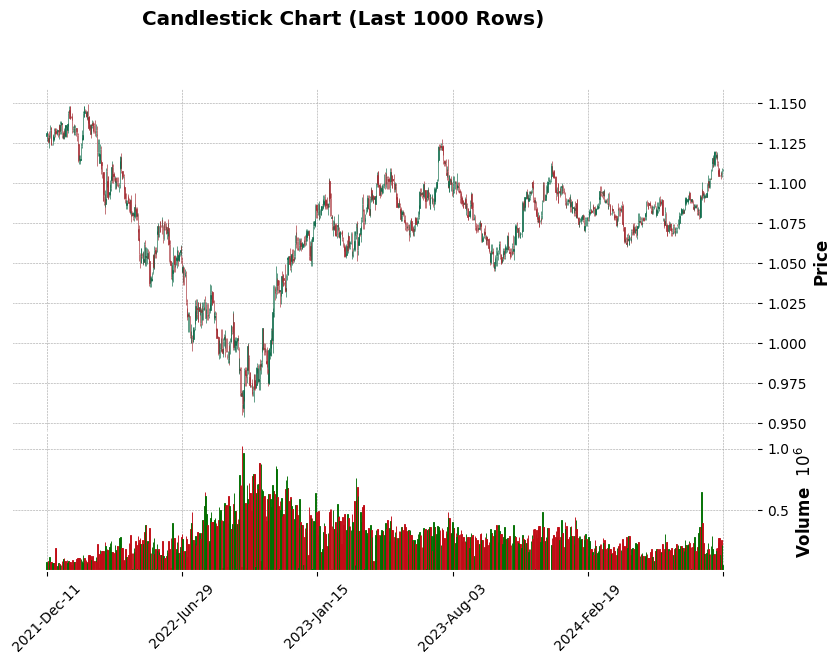

In [16]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


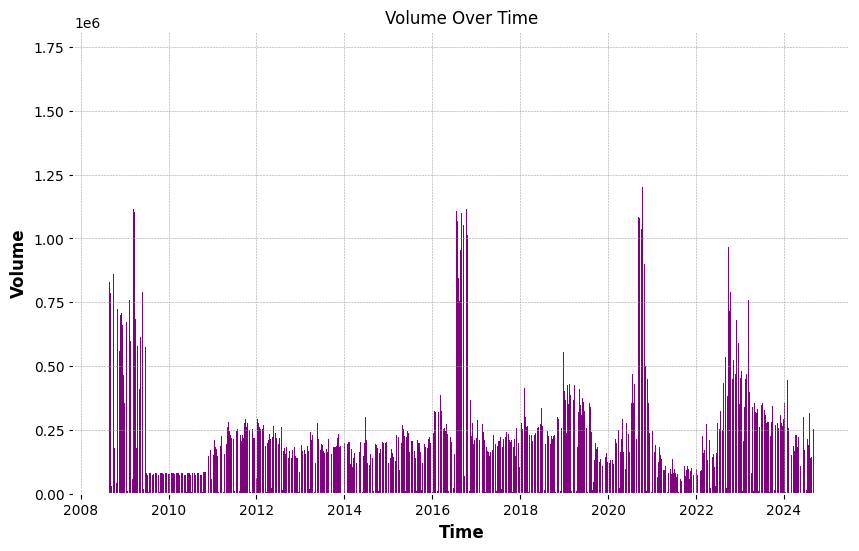

In [17]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


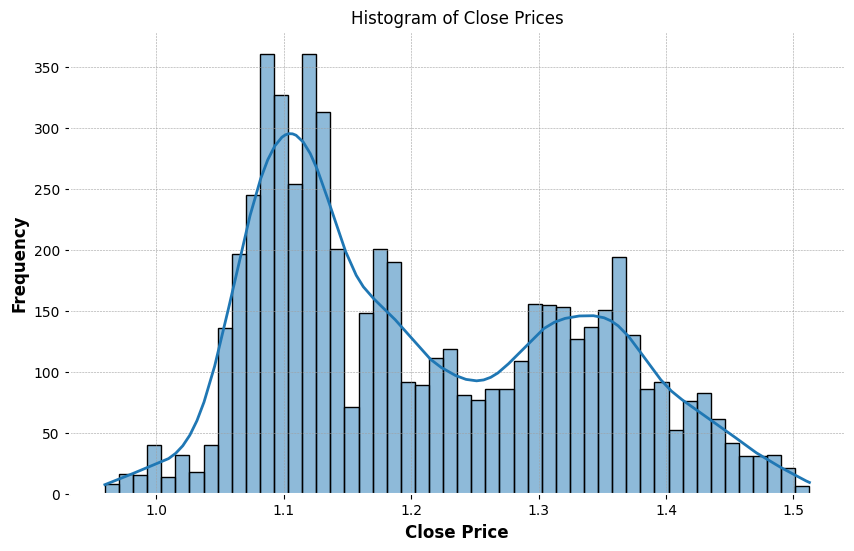

In [18]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

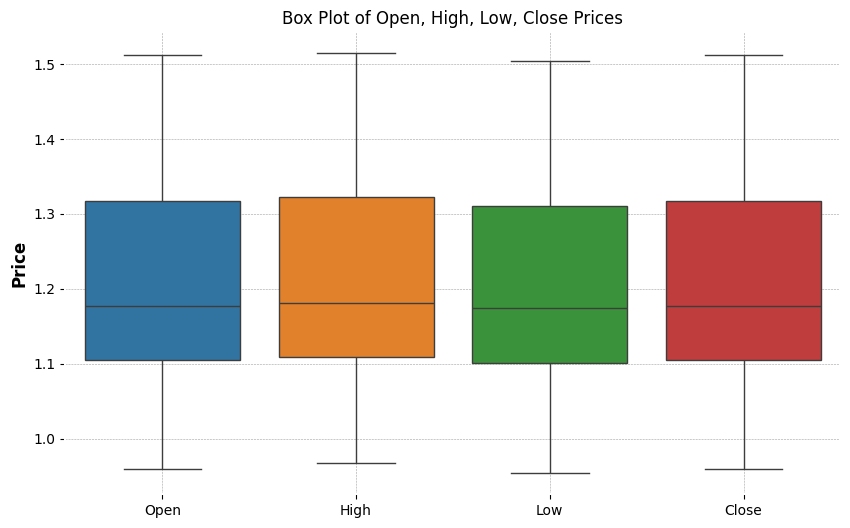

In [19]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

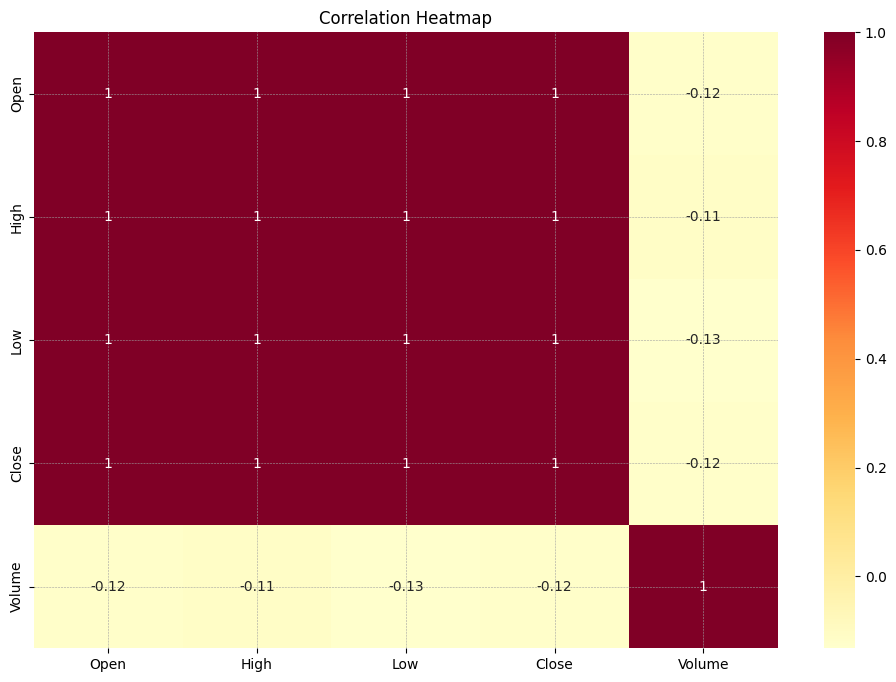

In [20]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

In [21]:
# 1. High-Low Range
df['High_Low_Range'] = df['High'] - df['Low']

# 2. Open-High Range
df['Open_High_Range'] = df['High'] - df['Open']

# 3. Open-Low Range
df['Open_Low_Range'] = df['Open'] - df['Low']

# 4. Rolling Volatility (using a 3-period window)
df['Rolling_Volatility'] = df[['Open', 'High', 'Low']].std(axis=1).rolling(window=3).mean()

# 5. True Range
df['True_Range'] = df.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Open']), abs(row['Low'] - row['Open'])), axis=1)

# 6. Moving Averages (SMA)
df['SMA_Open_3'] = df['Open'].rolling(window=3).mean()  # 3-period SMA of Open
df['SMA_High_3'] = df['High'].rolling(window=3).mean()  # 3-period SMA of High

# 7. Price Momentum (for Open and High, lag of 1 period)
df['Momentum_Open_1'] = df['Open'] - df['Open'].shift(1)
df['Momentum_High_1'] = df['High'] - df['High'].shift(1)

# 8. Exponential Moving Average (EMA) for Open (with a smoothing factor, alpha)
df['EMA_Open'] = df['Open'].ewm(span=3, adjust=False).mean()  # 3-period EMA of Open

# 9. Volume Change (percentage change)
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 10. Moving Average of Volume (SMA)
df['SMA_Volume_3'] = df['Volume'].rolling(window=3).mean()

# 11. Lagged features for Open, High, Low, and Volume (lag of 1 period)
df['Lagged_Open_1'] = df['Open'].shift(1)
df['Lagged_High_1'] = df['High'].shift(1)
df['Lagged_Low_1'] = df['Low'].shift(1)
df['Lagged_Volume_1'] = df['Volume'].shift(1)

window = 14  # Common default period for RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
df['RSI'] = 100 - (100 / (1 + gain / loss))

df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']


df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Bollinger_Upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
df['Bollinger_Lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()


df['Trend_Direction'] = np.where(df['Close'] > df['Open'], 1, -1)


df['Returns'] = df['Close'].pct_change()
df['Lagged_Returns_1'] = df['Returns'].shift(1)


df['EMA_Volume'] = df['Volume'].ewm(span=3, adjust=False).mean()


df['Range_5'] = df['High'].rolling(window=5).max() - df['Low'].rolling(window=5).min()




In [22]:
df.head()

,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,True_Range,...,EMA_26,MACD,SMA_20,Bollinger_Upper,Bollinger_Lower,Trend_Direction,Returns,Lagged_Returns_1,EMA_Volume,Range_5
Time,,,,,,,,,,,,,,,,,,,,,
2008-08-27,1.47356,1.47438,1.46625,1.47430,351296.0,0.00813,0.00082,0.00731,NaN,0.00813,...,1.474300,0.000000,NaN,NaN,NaN,1,NaN,NaN,351296.0000,NaN
2008-08-28,1.47462,1.48103,1.46691,1.47013,866737.0,0.01412,0.00641,0.00771,NaN,0.01412,...,1.473991,-0.000333,NaN,NaN,NaN,-1,-0.002828,NaN,609016.5000,NaN
2008-08-29,1.47026,1.47674,1.46368,1.46714,828348.0,0.01306,0.00648,0.00658,0.006025,0.01306,...,1.473484,-0.000828,NaN,NaN,NaN,-1,-0.002034,-0.002828,718682.2500,NaN
2008-08-30,1.47026,1.47674,1.46368,1.46714,828348.0,0.01306,0.00648,0.00658,0.006710,0.01306,...,1.473014,-0.001207,NaN,NaN,NaN,-1,0.000000,-0.002034,773515.1250,NaN
2008-08-31,1.46748,1.47198,1.46748,1.46967,33247.0,0.00450,0.00450,0.00000,0.005219,0.00450,...,1.472766,-0.001288,NaN,NaN,NaN,1,0.001724,0.000000,403381.0625,0.01735


In [23]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,2
True_Range,0


In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,0
True_Range,0


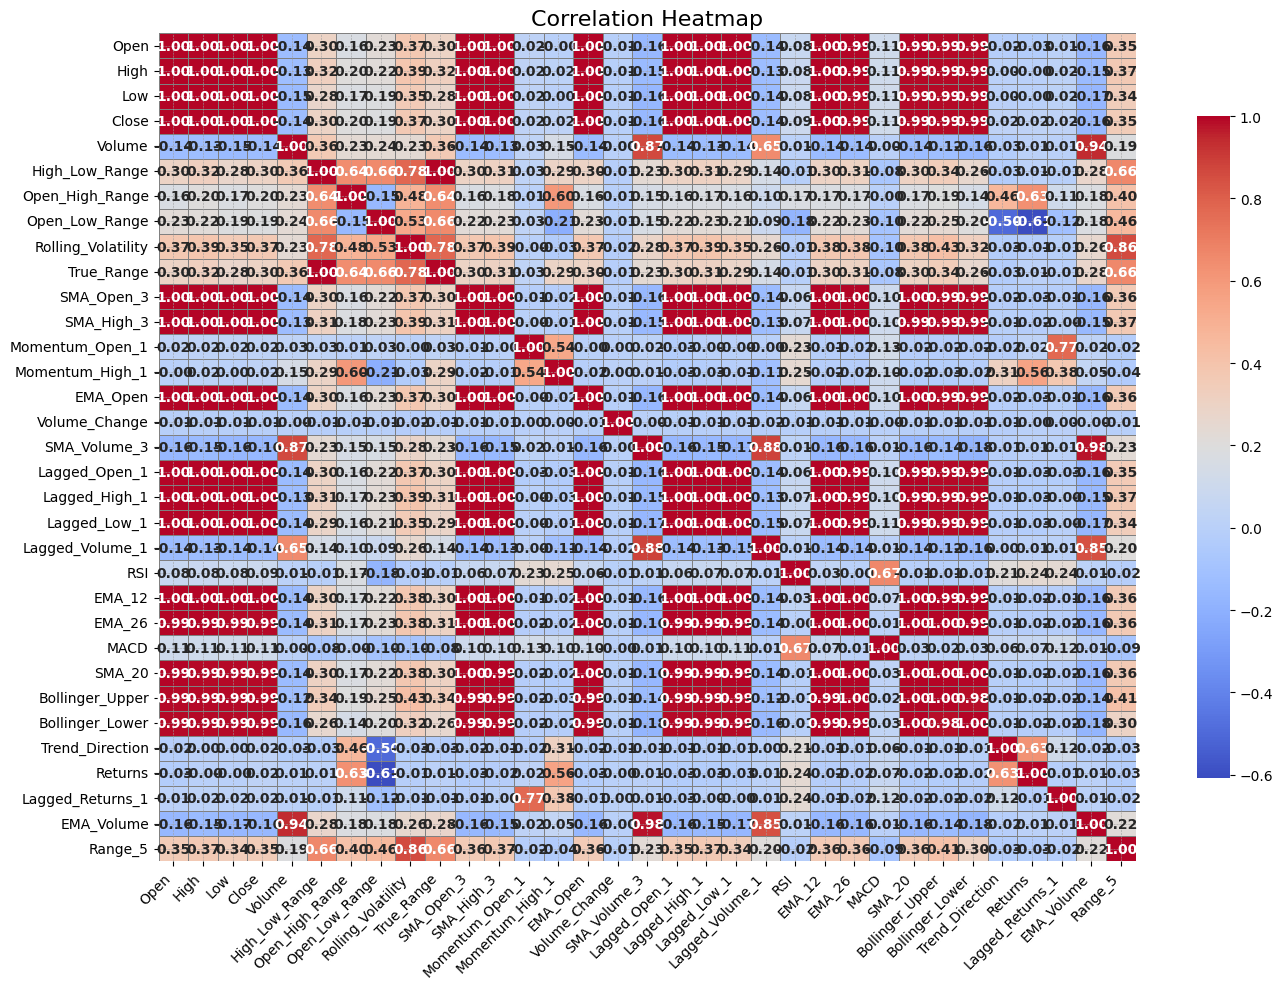

In [26]:
plt.figure(figsize=(14, 10))

corr = df.corr()
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10, "weight": 'bold'},
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [27]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,0
True_Range,0


# Feature Reduction

In [28]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drop_multicollinear_features(df, threshold=5.0, main_features=None):
    """
    Drop features from the DataFrame that have high multicollinearity,
    excluding specified main features from the dropping process.

    Parameters:
    - df: pandas DataFrame with features.
    - threshold: VIF threshold above which features are considered collinear.
    - main_features: List of main features that should not be dropped.

    Returns:
    - DataFrame with collinear features removed.
    """

    def calculate_vif(X):
        # Ensure all data is numeric
        X = X.apply(pd.to_numeric, errors='coerce')
        # Drop rows with NaN values
        X = X.replace([np.inf, -np.inf], np.nan).dropna()

        vif = pd.DataFrame()
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        return vif

    if main_features is None:
        main_features = []

    # Initialize the list of features to drop
    features_to_drop = []

    while True:
        # Calculate VIF for each feature
        vif = calculate_vif(df)

        # Exclude main features from dropping
        vif = vif[~vif['Features'].isin(main_features)]

        # Check for features with VIF above the threshold
        high_vif = vif[vif['VIF'] > threshold]

        if high_vif.empty:
            # If no features have high VIF, exit the loop
            break

        # Drop the feature with the highest VIF
        feature_to_drop = high_vif.sort_values('VIF', ascending=False).iloc[0]['Features']
        features_to_drop.append(feature_to_drop)
        df = df.drop(columns=[feature_to_drop])

        print(f"Dropped feature '{feature_to_drop}' with VIF: {high_vif['VIF'].max()}")

    return df, features_to_drop

# Example usage
# Assuming 'df' is your DataFrame and you want to keep these main features
main_features = ['Open', 'High', 'Low', 'Close', 'Volume']

cleaned_df, dropped_features = drop_multicollinear_features(df, threshold=5.0, main_features=main_features)

print("Dropped Features:", dropped_features)
print("Remaining Features:", cleaned_df.columns)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'High_Low_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Open_High_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Open_Low_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Lagged_High_1' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Bollinger_Upper' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Momentum_Open_1' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'EMA_12' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'True_Range' with VIF: inf
Dropped feature 'EMA_Open' with VIF: 14647544.416742044
Dropped feature 'SMA_High_3' with VIF: 5241123.49150774
Dropped feature 'EMA_26' with VIF: 973107.5260692515
Dropped feature 'Lagged_Open_1' with VIF: 478329.7946594827
Dropped feature 'SMA_Open_3' with VIF: 330156.86712837714
Dropped feature 'Lagged_Low_1' with VIF: 301304.25915621966
Dropped feature 'SMA_20' with VIF: 60122.78439609405
Dropped feature 'Bollinger_Lower' with VIF: 12988.568709041978
Dropped feature 'EMA_Volume' with VIF: 468.29901239949083
Dropped feature 'SMA_Volume_3' with VIF: 39.86154923088073
Dropped feature 'Rolling_Volatility' with VIF: 31.77613511120946
Dropped feature 'RSI' with VIF: 15.02505498814198
Dropped feature 'Returns' with VIF: 9.623097878656731
Dropped feature 'Range_5' with VIF: 8.774825806109247
Dropped Features: ['High_Low_Range', 'Open_High_Range', 'Open_Low_Range', 'Lagged_High_1', 'Bollinger_Upper', 'Momentum_Open_1', 'EMA_12', 'True_Range', 'EMA_

In [29]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'High_Low_Range',
       'Open_High_Range', 'Open_Low_Range', 'Rolling_Volatility', 'True_Range',
       'SMA_Open_3', 'SMA_High_3', 'Momentum_Open_1', 'Momentum_High_1',
       'EMA_Open', 'Volume_Change', 'SMA_Volume_3', 'Lagged_Open_1',
       'Lagged_High_1', 'Lagged_Low_1', 'Lagged_Volume_1', 'RSI', 'EMA_12',
       'EMA_26', 'MACD', 'SMA_20', 'Bollinger_Upper', 'Bollinger_Lower',
       'Trend_Direction', 'Returns', 'Lagged_Returns_1', 'EMA_Volume',
       'Range_5'],
      dtype='object')

In [30]:
cleaned_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Momentum_High_1',
       'Volume_Change', 'Lagged_Volume_1', 'MACD', 'Trend_Direction',
       'Lagged_Returns_1'],
      dtype='object')

In [31]:
cleaned_df.describe()

,Open,High,Low,Close,Volume,Momentum_High_1,Volume_Change,Lagged_Volume_1,MACD,Trend_Direction,Lagged_Returns_1
count,5835.000000,5835.000000,5835.000000,5835.000000,5.835000e+03,5835.000000,5.835000e+03,5.835000e+03,5835.000000,5835.000000,5835.000000
mean,1.207897,1.212395,1.203340,1.207799,2.214809e+05,-0.000056,1.465361e+03,2.214778e+05,-0.000417,0.013539,-0.000031
std,0.122788,0.123676,0.121773,0.122755,2.051597e+05,0.005878,8.387731e+04,2.051624e+05,0.006739,0.999994,0.004890
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00,-0.040000,-9.999903e+01,3.000000e+00,-0.036509,-1.000000,-0.026726
25%,1.104495,1.108130,1.100980,1.104045,8.331800e+04,-0.002220,-1.199498e+01,8.331800e+04,-0.003921,-1.000000,-0.001989
50%,1.177220,1.180270,1.173480,1.177110,1.897650e+05,0.000000,0.000000e+00,1.897650e+05,-0.000345,1.000000,0.000000
75%,1.315850,1.321020,1.309805,1.315935,2.619815e+05,0.002305,1.699645e+01,2.619815e+05,0.003499,1.000000,0.001855
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06,0.049350,6.406933e+06,1.723532e+06,0.035439,1.000000,0.034914


**PCA**

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [485]:
# Define the columns
pca_columns = ['High_Low_Range', 'Open_High_Range', 'Open_Low_Range',
               'Rolling_Volatility', 'True_Range', 'SMA_Open_3',
               'SMA_High_3', 'Momentum_Open_1', 'Momentum_High_1',
               'EMA_Open', 'Volume_Change', 'SMA_Volume_3',
               'Lagged_Open_1', 'Lagged_High_1', 'Lagged_Low_1',
               'Lagged_Volume_1', 'RSI', 'EMA_12', 'EMA_26',
               'MACD', 'SMA_20', 'Bollinger_Upper',
               'Bollinger_Lower', 'Trend_Direction',
               'Returns', 'Lagged_Returns_1', 'EMA_Volume',
               'Range_5']

pca_data = df[pca_columns]
original_data = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [486]:
# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

In [487]:
pca = PCA()
pca_components = pca.fit_transform(pca_data_scaled)

# Create descriptive names for the components
n_components = pca.n_components_
component_names = [f'Principal Component {i+1}' for i in range(n_components)]

# Create a DataFrame with PCA components and descriptive names
pca_df = pd.DataFrame(data=pca_components, columns=component_names)


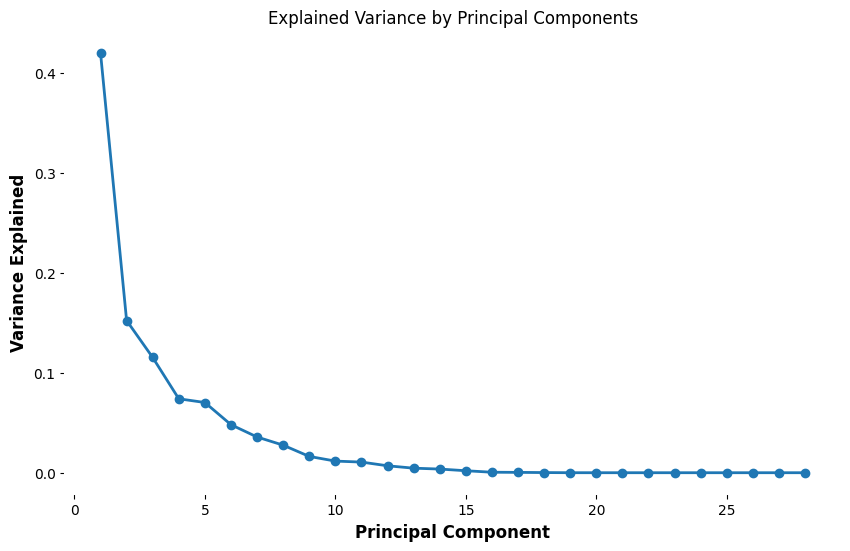

In [488]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

In [489]:
n_components_to_keep = 6
reduced_pca_df = pd.DataFrame(data=pca_df.iloc[:, :n_components_to_keep])

In [490]:
# Combine reduced PCA components with original data
combined_reduced_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']].reset_index(drop=False),
                                   reduced_pca_df.reset_index(drop=True)], axis=1)

In [491]:
# If 'Time' is a column in your DataFrame
combined_reduced_df['Time'] = pd.to_datetime(combined_reduced_df['Time'])
combined_reduced_df.set_index('Time', inplace=True)

In [493]:
combined_reduced_df.head()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2008-09-15,1.43164,1.44821,1.40820,1.42425,860968.0,8.277581,7.816250,-0.454711,-2.922357,2.547236,-1.645991
2008-09-16,1.42423,1.42826,1.40699,1.41656,864027.0,6.919829,4.991110,-4.904329,2.214791,-1.476241,-0.497861
2008-09-17,1.41667,1.43837,1.40966,1.43350,861225.0,7.249772,8.016427,1.612999,1.329755,-3.704592,-1.317636
2008-09-18,1.43353,1.45404,1.42772,1.42985,858985.0,6.983278,7.471672,1.919718,2.253206,2.076270,-3.393400
2008-09-19,1.42982,1.44975,1.41494,1.44646,785263.0,7.744091,8.529035,0.503412,1.301722,-2.528110,-0.176462


In [494]:
combined_reduced_df.describe()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
count,5835.000000,5835.000000,5835.000000,5835.000000,5.835000e+03,5.835000e+03,5.835000e+03,5.835000e+03,5.835000e+03,5.835000e+03,5.835000e+03
mean,1.207897,1.212395,1.203340,1.207799,2.214809e+05,1.558688e-16,-8.767622e-17,-1.339498e-17,1.948361e-17,3.409631e-17,-1.948361e-17
std,0.122788,0.123676,0.121773,0.122755,2.051597e+05,3.430185e+00,2.064969e+00,1.796812e+00,1.439184e+00,1.402555e+00,1.159912e+00
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00,-6.665849e+00,-4.298758e+00,-1.051247e+01,-8.099769e+00,-7.607814e+00,-6.313017e+00
25%,1.104495,1.108130,1.100980,1.104045,8.331800e+04,-2.918388e+00,-1.361808e+00,-1.105123e+00,-7.696007e-01,-7.108302e-01,-7.733002e-01
50%,1.177220,1.180270,1.173480,1.177110,1.897650e+05,-1.078480e+00,-3.749602e-01,-3.440937e-02,-9.602065e-02,-1.585827e-02,-2.449006e-02
75%,1.315850,1.321020,1.309805,1.315935,2.619815e+05,2.974618e+00,8.114482e-01,1.126131e+00,6.224950e-01,7.106976e-01,7.500097e-01
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06,9.334208e+00,1.477999e+01,1.134593e+01,8.325490e+00,8.529284e+00,9.400588e+00


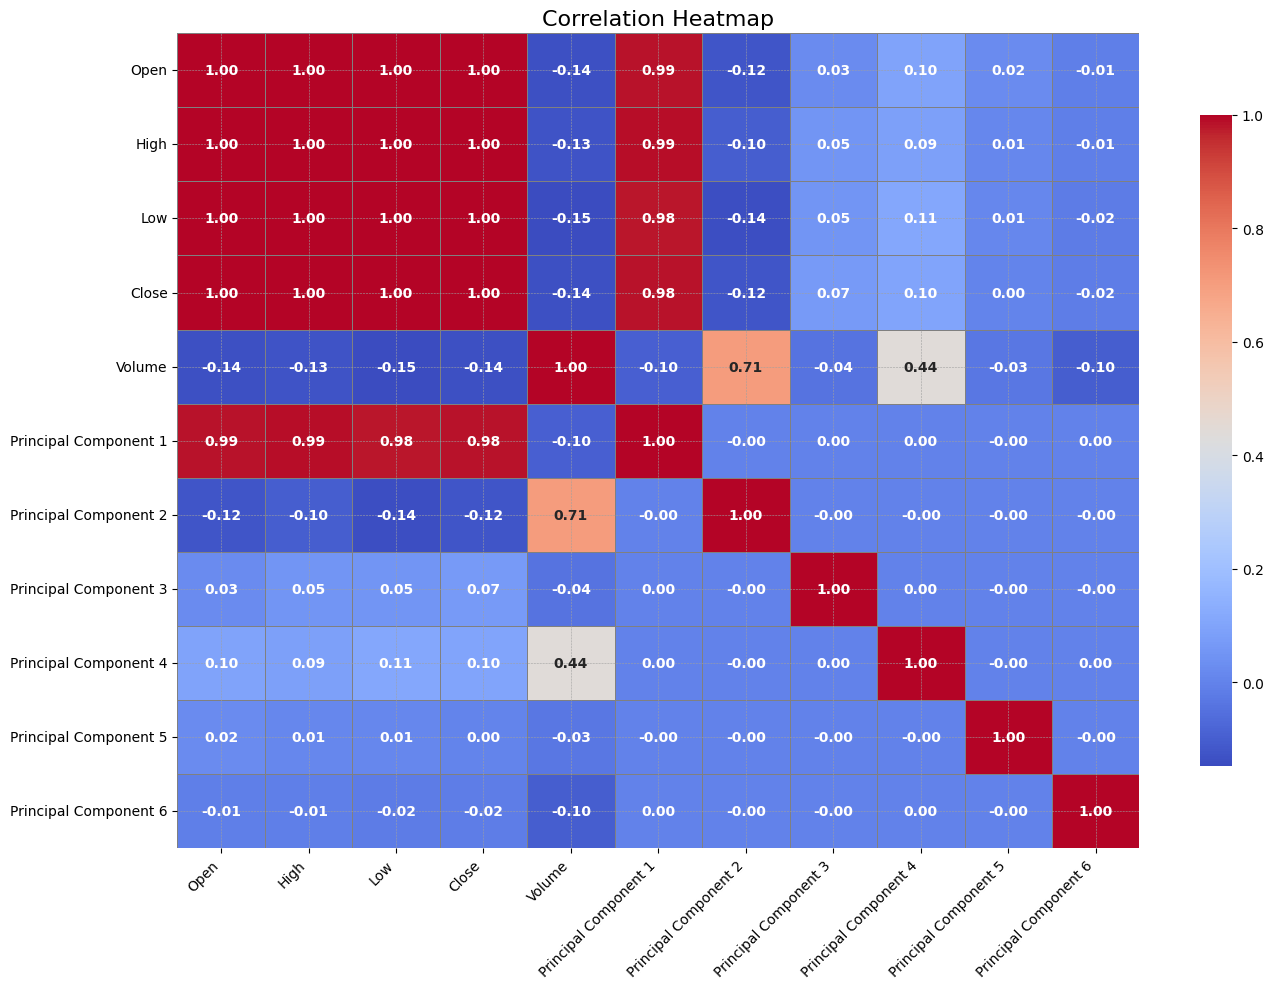

In [495]:
plt.figure(figsize=(14, 10))

corr = combined_reduced_df.corr()
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10, "weight": 'bold'},
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## Splitting the Data

In [509]:
combined_reduced_df = combined_reduced_df.sort_index()

In [510]:
data = combined_reduced_df

# std_scaler = StandardScaler()

# data['Volume'] = std_scaler.fit_transform(data[['Volume']])

In [511]:
# Split into training (80%) and testing (20%) sets based on time
train_size = int(len(combined_reduced_df) * 0.8)
X_train = combined_reduced_df.iloc[:train_size]
X_test = combined_reduced_df.iloc[train_size:]

In [512]:
# Display shapes of training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (4668, 11)
Testing set shape: (1167, 11)


In [513]:
data = data.asfreq('D')

In [514]:
print("Current Frequency:", data.index.freq)

Current Frequency: <Day>


In [515]:
X_train.head()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2008-09-15,1.43164,1.44821,1.40820,1.42425,860968.0,8.277581,7.816250,-0.454711,-2.922357,2.547236,-1.645991
2008-09-16,1.42423,1.42826,1.40699,1.41656,864027.0,6.919829,4.991110,-4.904329,2.214791,-1.476241,-0.497861
2008-09-17,1.41667,1.43837,1.40966,1.43350,861225.0,7.249772,8.016427,1.612999,1.329755,-3.704592,-1.317636
2008-09-18,1.43353,1.45404,1.42772,1.42985,858985.0,6.983278,7.471672,1.919718,2.253206,2.076270,-3.393400
2008-09-19,1.42982,1.44975,1.41494,1.44646,785263.0,7.744091,8.529035,0.503412,1.301722,-2.528110,-0.176462


In [516]:
X_train.tail()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2021-06-22,1.19119,1.19526,1.18808,1.19364,90408.0,-0.616095,-1.281802,0.788435,-1.092950,-0.050111,-1.946236
2021-06-23,1.19364,1.19700,1.19113,1.19296,89389.0,-0.590938,-1.441056,-0.492430,-0.993193,0.351910,-1.705757
2021-06-24,1.19297,1.19562,1.19176,1.19278,81793.0,-0.718741,-1.967943,-0.875227,-0.727740,-0.364371,-1.392128
2021-06-25,1.19278,1.19751,1.19261,1.19347,73327.0,-0.690194,-1.755918,0.546583,-0.866716,-0.894516,-1.410458
2021-06-26,1.19278,1.19751,1.19261,1.19347,73327.0,-0.733166,-1.913487,0.429532,-0.797317,-0.791449,-1.395690


In [517]:
X_train.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Principal Component 1,0
Principal Component 2,0
Principal Component 3,0
Principal Component 4,0
Principal Component 5,0


## Training and Evaluating Models

### VECM Model

In [566]:
from statsmodels.tsa.vector_ar.vecm import *

### Johansen Test for Cointegration

In [567]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def test_cointegration(df):
    """
    Perform Johansen cointegration test on level data.

    Parameters:
    - df: pandas DataFrame with level time series data.

    Returns:
    - None; prints the results.
    """
    # Check for missing values
    if df.isnull().sum().sum() > 0:
        df = df.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill

    # Check if the matrix is positive definite
    try:
        jres = coint_johansen(df, det_order=1, k_ar_diff=1)  # Adjust det_order as needed
        trace_stat = jres.lr1
        crit_values = jres.cvt
        print('Johansen Cointegration Test Results:')
        print('Trace Statistic:', trace_stat)
        print('Critical Values:', crit_values)

        num_cointegrating_relations = np.sum(trace_stat > crit_values[:, 1])
        print(f'Number of Cointegrating Relations: {num_cointegrating_relations}')

    except np.linalg.LinAlgError as e:
        print("Error during Johansen test:", e)


In [568]:
test_cointegration(X_train)

Johansen Cointegration Test Results:
Trace Statistic: [4.07227031e+04 2.70159907e+04 1.81464368e+04 1.03734374e+04
 6.56202498e+03 4.41137513e+03 2.66161775e+03 1.45456213e+03
 6.73290790e+02 1.69597389e+02 7.54019691e+00]
Critical Values: [[298.8836 306.8988 322.4264]
 [251.6293 259.0267 273.3838]
 [208.3582 215.1268 228.2226]
 [169.0618 175.1584 187.1891]
 [133.7852 139.278  150.0778]
 [102.4674 107.3429 116.9829]
 [ 75.1027  79.3422  87.7748]
 [ 51.6492  55.2459  62.5202]
 [ 32.0645  35.0116  41.0815]
 [ 16.1619  18.3985  23.1485]
 [  2.7055   3.8415   6.6349]]
Number of Cointegrating Relations: 11


### Phillips-Hansen Cointegration Test

In [569]:
from statsmodels.tsa.stattools import coint

def test_cointegration_phillips_hansen(df):
    for column in df.columns:
        for other_column in df.columns:
            if column != other_column:
                score, p_value, _ = coint(df[column], df[other_column])
                print(f'Cointegration test between {column} and {other_column}: p-value = {p_value}')

In [570]:
# test_cointegration_phillips_hansen(data)

In [571]:
# Split the data into training and test sets (e.g., 80% training, 20% test)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]


In [572]:
test_data.head()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2021-06-27,1.19296,1.19419,1.19296,1.19414,2973.0,-0.993099,-2.859836,0.019202,-0.349086,-0.834064,-1.337731
2021-06-28,1.19415,1.19444,1.19022,1.19286,83003.0,-0.806717,-2.376155,-0.910020,-0.936906,0.411176,-1.305471
2021-06-29,1.19287,1.19295,1.18775,1.19002,87518.0,-0.750097,-2.049390,-1.499920,-0.883280,0.089965,-1.064583
2021-06-30,1.19003,1.19090,1.18450,1.18558,98228.0,-0.635226,-1.578774,-1.714166,-0.963476,-0.061450,-0.654741
2021-07-01,1.18559,1.18842,1.18373,1.18457,97912.0,-0.825111,-1.854204,-1.097527,-0.646013,-0.781118,-0.447969


In [573]:
# Select lag order and cointegration rank based on the training data
lag_order_train = select_order(data=train_data, maxlags=10, deterministic="ci", seasons=5)
rank_test_train = select_coint_rank(train_data, 1, 1, method="trace", signif=0.1)


In [574]:
# Fit VECM model on the training data
vecm_model = VECM(train_data, deterministic="ci", seasons=5,
                  k_ar_diff=lag_order.aic,
                  coint_rank=rank_test.rank)
vecm_res = vecm_model.fit()

In [575]:
n_steps = 5
vecm_res.predict(steps=n_steps)

array([[ 1.19360305e+00,  1.19697598e+00,  1.19086921e+00,
         1.19359304e+00,  1.05989575e+05, -6.25861556e-01,
        -1.61348194e+00, -1.29486115e-01, -8.75679353e-01,
        -2.71643154e-01, -1.12781289e+00],
       [ 1.19352327e+00,  1.19760326e+00,  1.18994569e+00,
         1.19398688e+00,  1.34474521e+05, -5.19493237e-01,
        -1.11419703e+00, -6.67678989e-02, -9.21032247e-01,
        -2.45679474e-01, -9.48089182e-01],
       [ 1.19383039e+00,  1.19748623e+00,  1.19046472e+00,
         1.19416479e+00,  1.15651345e+05, -5.23676679e-01,
        -1.05786841e+00, -1.05634471e-01, -7.21043408e-01,
        -1.80611206e-01, -8.56973303e-01],
       [ 1.19413509e+00,  1.19779830e+00,  1.19049024e+00,
         1.19413215e+00,  1.22680863e+05, -4.81553352e-01,
        -9.56665787e-01, -7.30544977e-02, -7.73245168e-01,
        -1.11323700e-01, -7.19026083e-01],
       [ 1.19407918e+00,  1.19761746e+00,  1.19049323e+00,
         1.19393228e+00,  1.16895130e+05, -4.87788104e-01,
  

In [576]:
train_data.head()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2008-09-15,1.43164,1.44821,1.40820,1.42425,860968.0,8.277581,7.816250,-0.454711,-2.922357,2.547236,-1.645991
2008-09-16,1.42423,1.42826,1.40699,1.41656,864027.0,6.919829,4.991110,-4.904329,2.214791,-1.476241,-0.497861
2008-09-17,1.41667,1.43837,1.40966,1.43350,861225.0,7.249772,8.016427,1.612999,1.329755,-3.704592,-1.317636
2008-09-18,1.43353,1.45404,1.42772,1.42985,858985.0,6.983278,7.471672,1.919718,2.253206,2.076270,-3.393400
2008-09-19,1.42982,1.44975,1.41494,1.44646,785263.0,7.744091,8.529035,0.503412,1.301722,-2.528110,-0.176462


In [577]:
forecast = vecm_res.predict(steps=n_steps)


forecast_interval = vecm_res.predict(steps=n_steps, alpha=0.05)
lower_bound, upper_bound = forecast_interval[1], forecast_interval[2]

forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=n_steps, freq='B')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=train_data.columns)

In [578]:
test_data.head(n_steps)

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2021-06-27,1.19296,1.19419,1.19296,1.19414,2973.0,-0.993099,-2.859836,0.019202,-0.349086,-0.834064,-1.337731
2021-06-28,1.19415,1.19444,1.19022,1.19286,83003.0,-0.806717,-2.376155,-0.910020,-0.936906,0.411176,-1.305471
2021-06-29,1.19287,1.19295,1.18775,1.19002,87518.0,-0.750097,-2.049390,-1.499920,-0.883280,0.089965,-1.064583
2021-06-30,1.19003,1.19090,1.18450,1.18558,98228.0,-0.635226,-1.578774,-1.714166,-0.963476,-0.061450,-0.654741
2021-07-01,1.18559,1.18842,1.18373,1.18457,97912.0,-0.825111,-1.854204,-1.097527,-0.646013,-0.781118,-0.447969


In [579]:
forecast_df.head(n_steps)

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
2021-06-28,1.193603,1.196976,1.190869,1.193593,105989.575482,-0.625862,-1.613482,-0.129486,-0.875679,-0.271643,-1.127813
2021-06-29,1.193523,1.197603,1.189946,1.193987,134474.521098,-0.519493,-1.114197,-0.066768,-0.921032,-0.245679,-0.948089
2021-06-30,1.193830,1.197486,1.190465,1.194165,115651.345391,-0.523677,-1.057868,-0.105634,-0.721043,-0.180611,-0.856973
2021-07-01,1.194135,1.197798,1.190490,1.194132,122680.862734,-0.481553,-0.956666,-0.073054,-0.773245,-0.111324,-0.719026
2021-07-02,1.194079,1.197617,1.190493,1.193932,116895.130027,-0.487788,-0.991690,-0.123903,-0.717863,-0.134060,-0.592924


**Testing**

In [580]:
# Assuming 'test_data' is your DataFrame with testing data
# Split the last 20 observations
actual_last_20 = test_data.iloc[:n_steps]
remaining_test_data = data.iloc[:-n_steps]  # All but the last 20

In [581]:
def calculate_metrics(actual, predicted):
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # MAPE in percentage

    return mae, mse, rmse, mape


# Ensure we only evaluate columns that exist in both DataFrames
common_columns = set(actual_last_20.columns).intersection(set(forecast_df.columns))

# Loop through each common column and calculate metrics
for column in common_columns:
    if column not in  ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
      actual_values = actual_last_20[column][:n_steps]

      # Get predicted values from forecast_df
      predicted_values = forecast_df[column]

      # Calculate metrics
      mae, mse, rmse, mape = calculate_metrics(actual_values, predicted_values)

      # Print results
      print(f"\nEvaluation Metrics for '{column}':")
      print(f"Mean Absolute Error (MAE): {mae:.8f}")
      print(f"Mean Squared Error (MSE): {mse:.8f}")
      print(f"Root Mean Squared Error (RMSE): {rmse:.8f}")
      print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Evaluation Metrics for 'Volume':
Mean Absolute Error (MAE): 28033.82617630
Mean Squared Error (MSE): 912591762.93940568
Root Mean Squared Error (RMSE): 30209.13376678
Mean Absolute Percentage Error (MAPE): 31.10%

Evaluation Metrics for 'High':
Mean Absolute Error (MAE): 0.00578844
Mean Squared Error (MSE): 0.00003985
Root Mean Squared Error (RMSE): 0.00631298
Mean Absolute Percentage Error (MAPE): 0.49%

Evaluation Metrics for 'Close':
Mean Absolute Error (MAE): 0.00571171
Mean Squared Error (MSE): 0.00004535
Root Mean Squared Error (RMSE): 0.00673436
Mean Absolute Percentage Error (MAPE): 0.48%

Evaluation Metrics for 'Low':
Mean Absolute Error (MAE): 0.00389247
Mean Squared Error (MSE): 0.00002163
Root Mean Squared Error (RMSE): 0.00465084
Mean Absolute Percentage Error (MAPE): 0.33%

Evaluation Metrics for 'Open':
Mean Absolute Error (MAE): 0.00338642
Mean Squared Error (MSE): 0.00002205
Root Mean Squared Error (RMSE): 0.00469541
Mean Absolute Percentage Error (MAPE): 0.29%


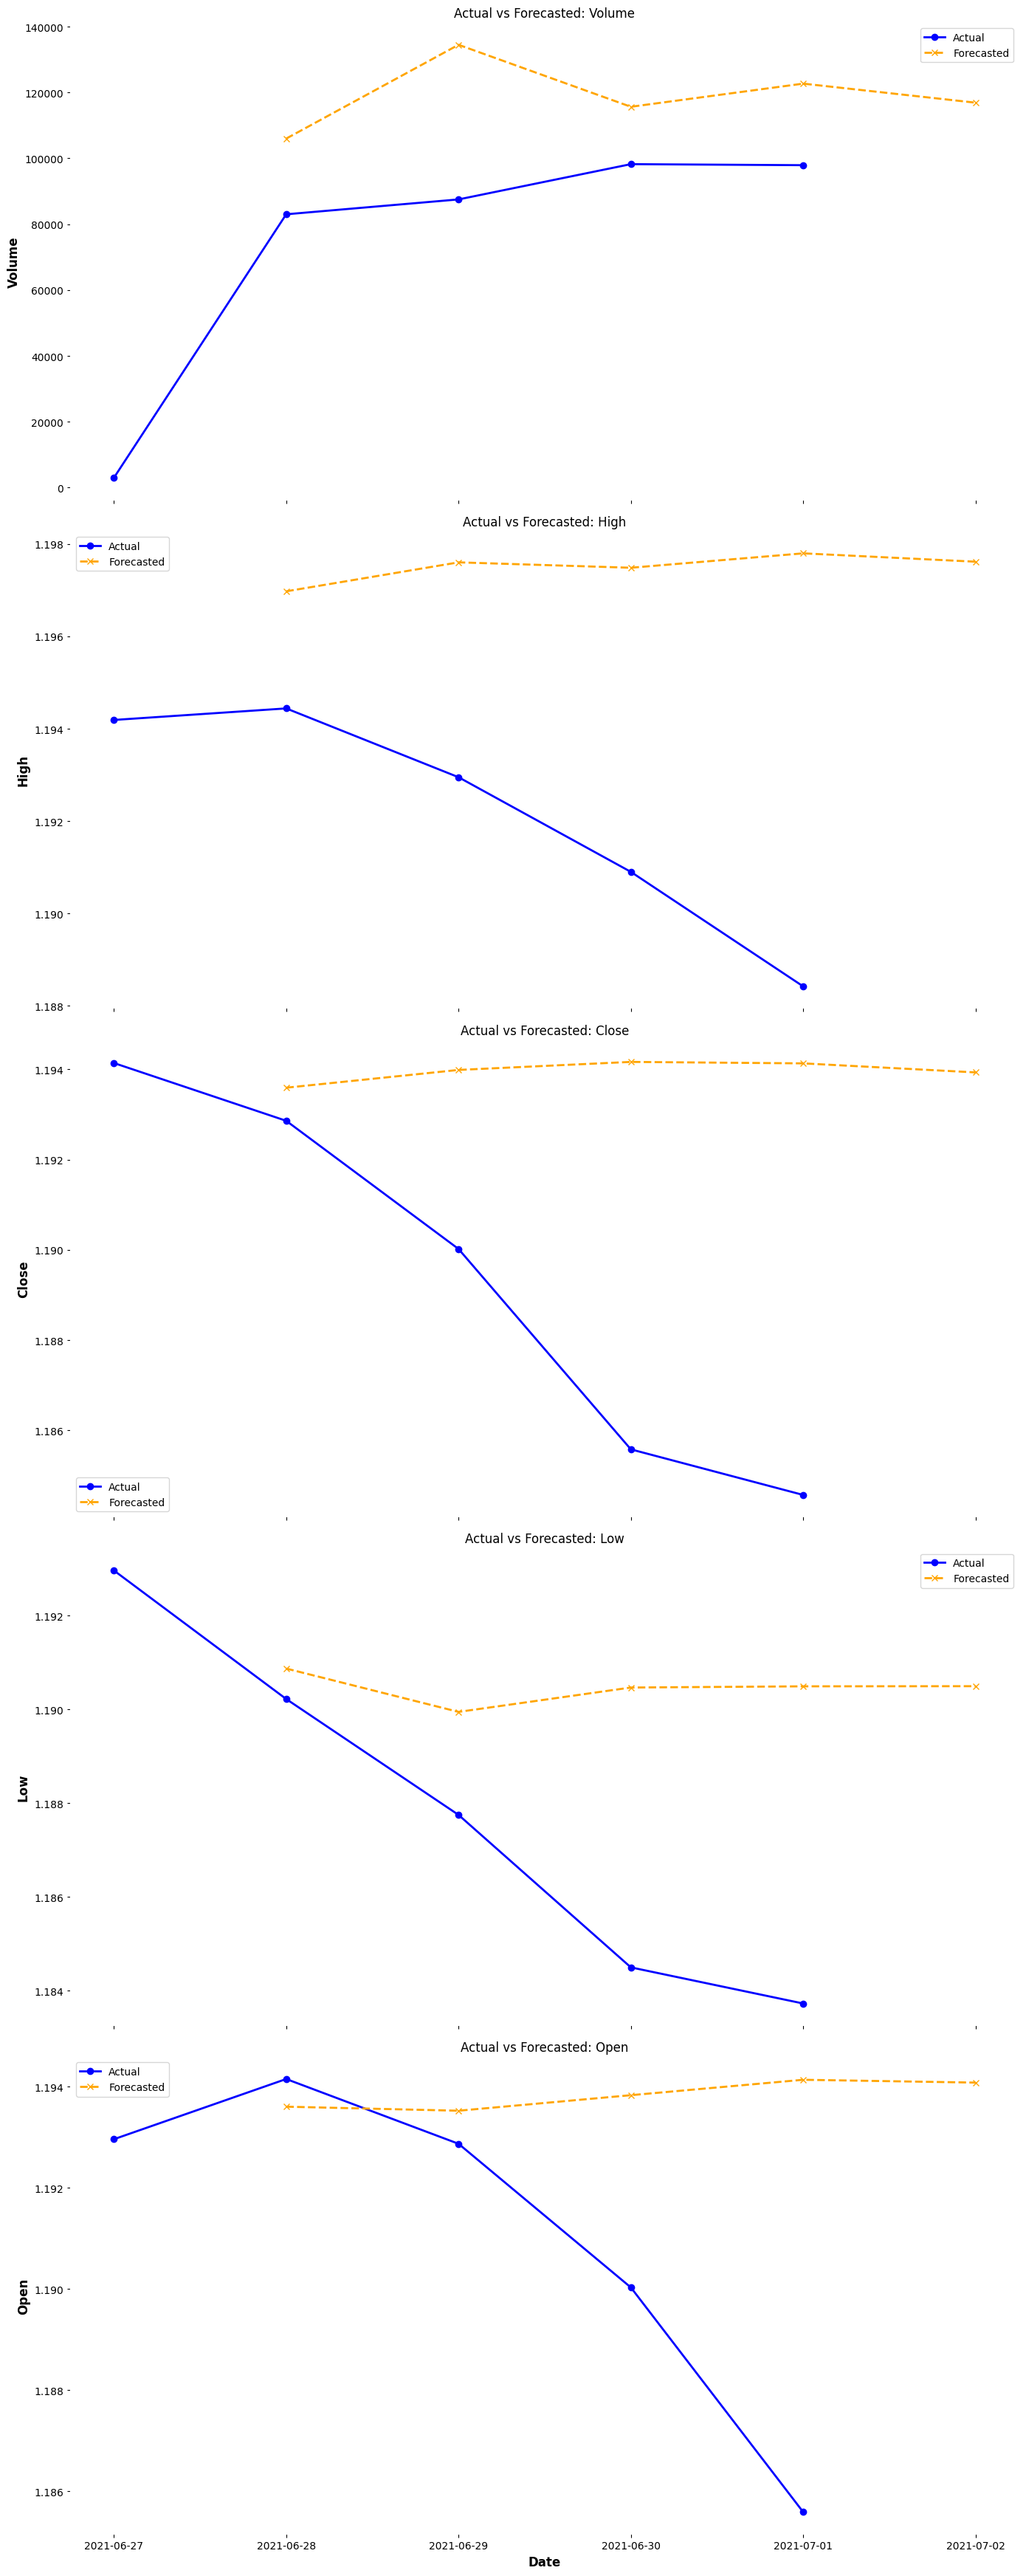

In [582]:
# Identify common columns
common_columns = set(actual_last_20.columns).intersection(set(forecast_df.columns))

# Prepare the data for plotting by extracting actual and forecasted values for common columns
plot_data = {}
for column in common_columns:
  if column not in ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
    actual_values = actual_last_20[column]
    forecasted_values = forecast_df[column]
    plot_data[column] = (actual_values, forecasted_values)

# Create a figure for plotting
fig, axs = plt.subplots(nrows=len(plot_data), ncols=1, figsize=(14, 7 * len(plot_data)), sharex=True)

# Loop through each common column and create subplots
for i, (column, (actual, forecasted)) in enumerate(plot_data.items()):
  if column not in  ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
    axs[i].plot(actual.index, actual, label='Actual', color='blue', marker='o')  # Actual values
    axs[i].plot(forecasted.index, forecasted, label='Forecasted', color='orange', linestyle='--', marker='x')  # Forecasted values
    axs[i].set_title(f'Actual vs Forecasted: {column}')
    axs[i].set_ylabel(column)
    axs[i].legend()
    axs[i].grid()

# Set common x-label for all subplots
axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

## Structural analysis

**Granger causality**

In [583]:
granger_results = vecm_res.test_granger_causality(caused="Close", signif=0.1)
granger_results.summary()

Test statistic,Critical value,p-value,df
1.216,1.342,0.193,"(30, 50765)"


In [584]:
granger_results = vecm_res.test_granger_causality(caused="Volume", signif=0.1)
granger_results.summary()

Test statistic,Critical value,p-value,df
43.36,1.342,0.000,"(30, 50765)"


In [585]:
granger_results = vecm_res.test_granger_causality(caused="Open", signif=0.1)
granger_results.summary()

Test statistic,Critical value,p-value,df
722.4,1.342,0.000,"(30, 50765)"


#### Instantaneous causality

In [586]:
print(test_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Principal Component 1',
       'Principal Component 2', 'Principal Component 3',
       'Principal Component 4', 'Principal Component 5',
       'Principal Component 6'],
      dtype='object')


In [587]:
inst_caus_dp_r = vecm_res.test_inst_causality(causing='Close')
inst_caus_r_dp = vecm_res.test_inst_causality(causing="Volume")
inst_caus_r_dp.summary()

Test statistic,Critical value,p-value,df
2332.,18.31,0.000,10


In [588]:
inst_caus_dp_r = vecm_res.test_inst_causality(causing="Volume")
inst_caus_r_dp = vecm_res.test_inst_causality(causing="Close")
inst_caus_r_dp.summary()

Test statistic,Critical value,p-value,df
2260.,18.31,0.000,10


**Impulse-Response-Analysis**

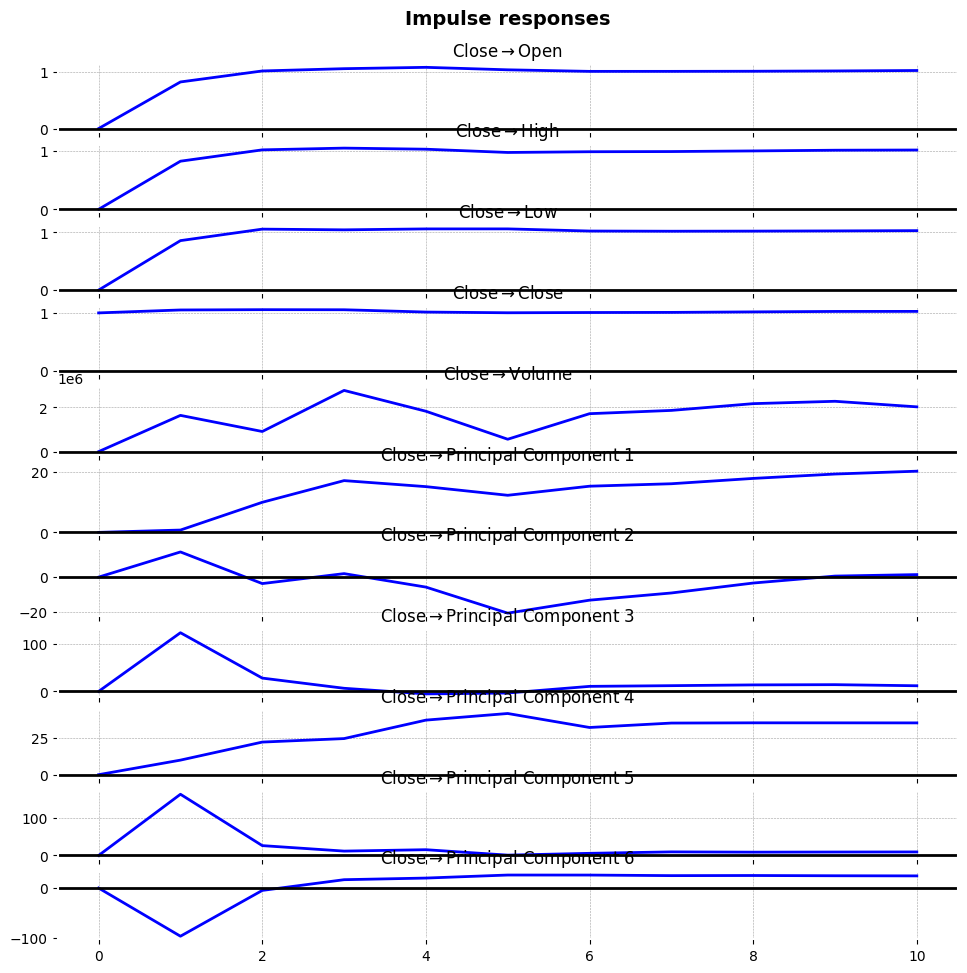

<Figure size 640x480 with 0 Axes>

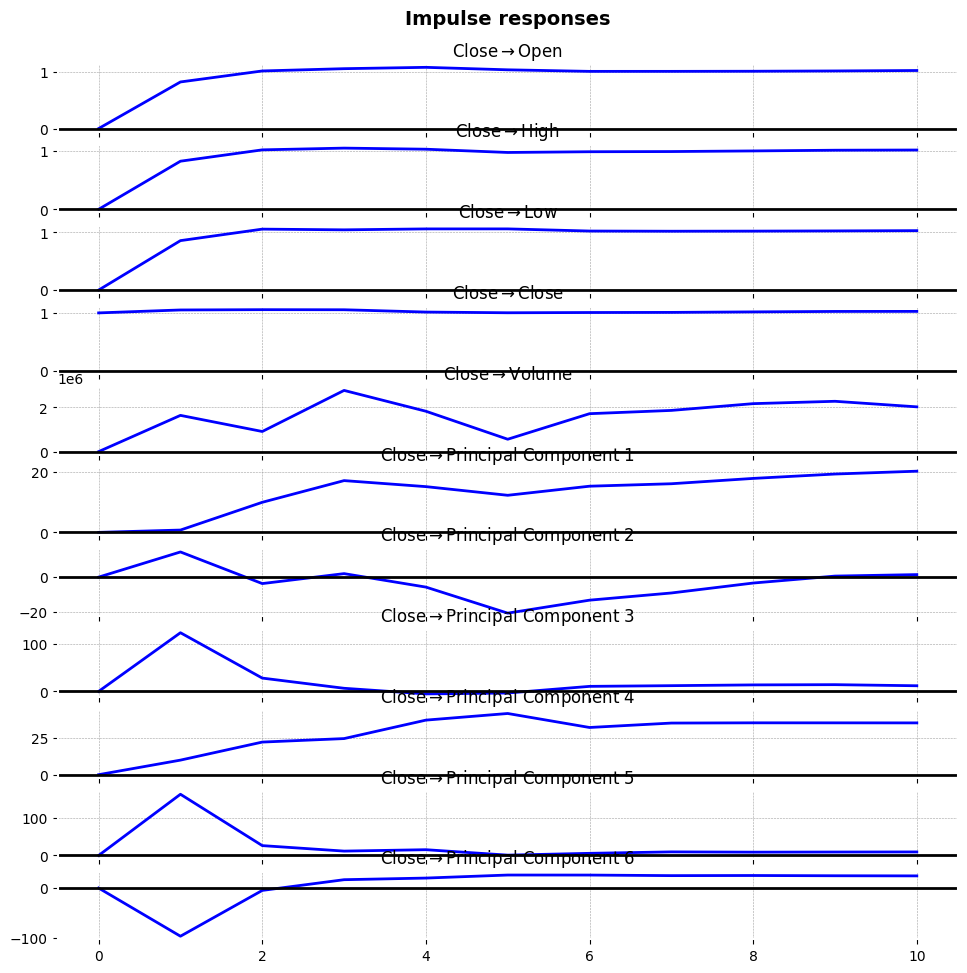

In [589]:
num_periods = 10
ir = vecm_res.irf(periods=num_periods)
plt.clf()
ir.plot(impulse='Close',plot_stderr=False)

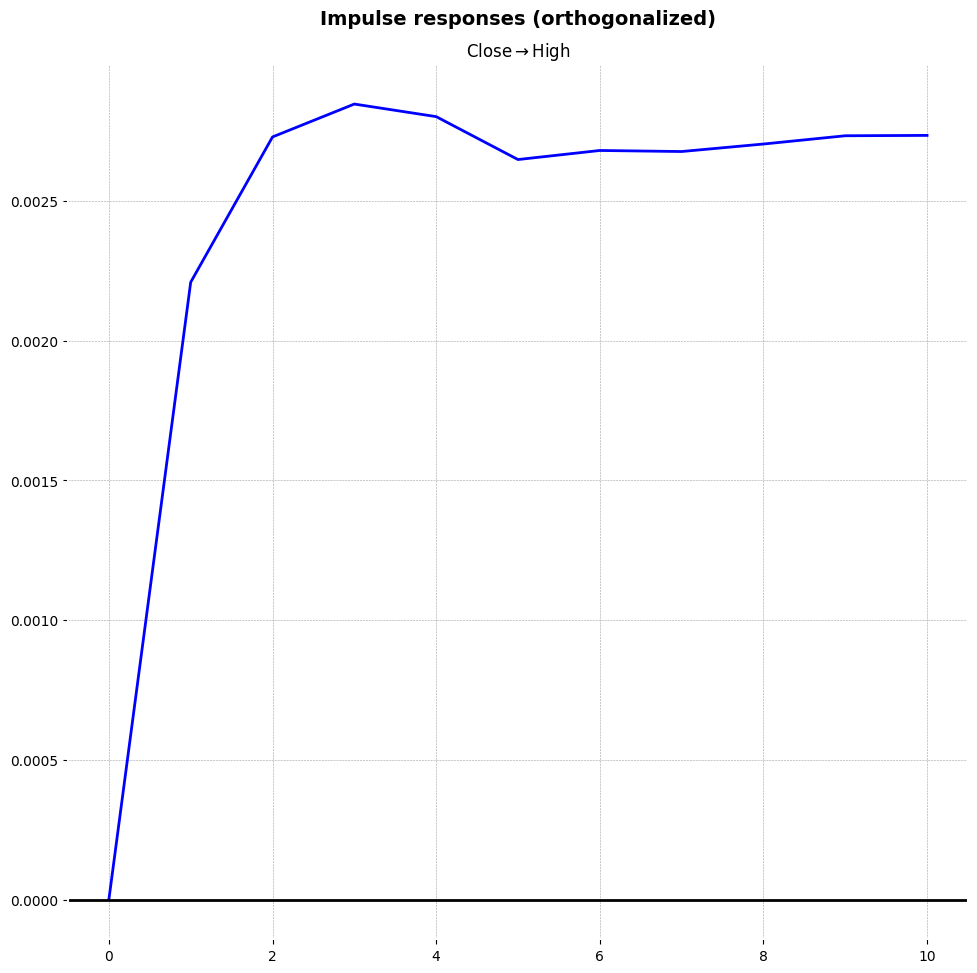

<Figure size 640x480 with 0 Axes>

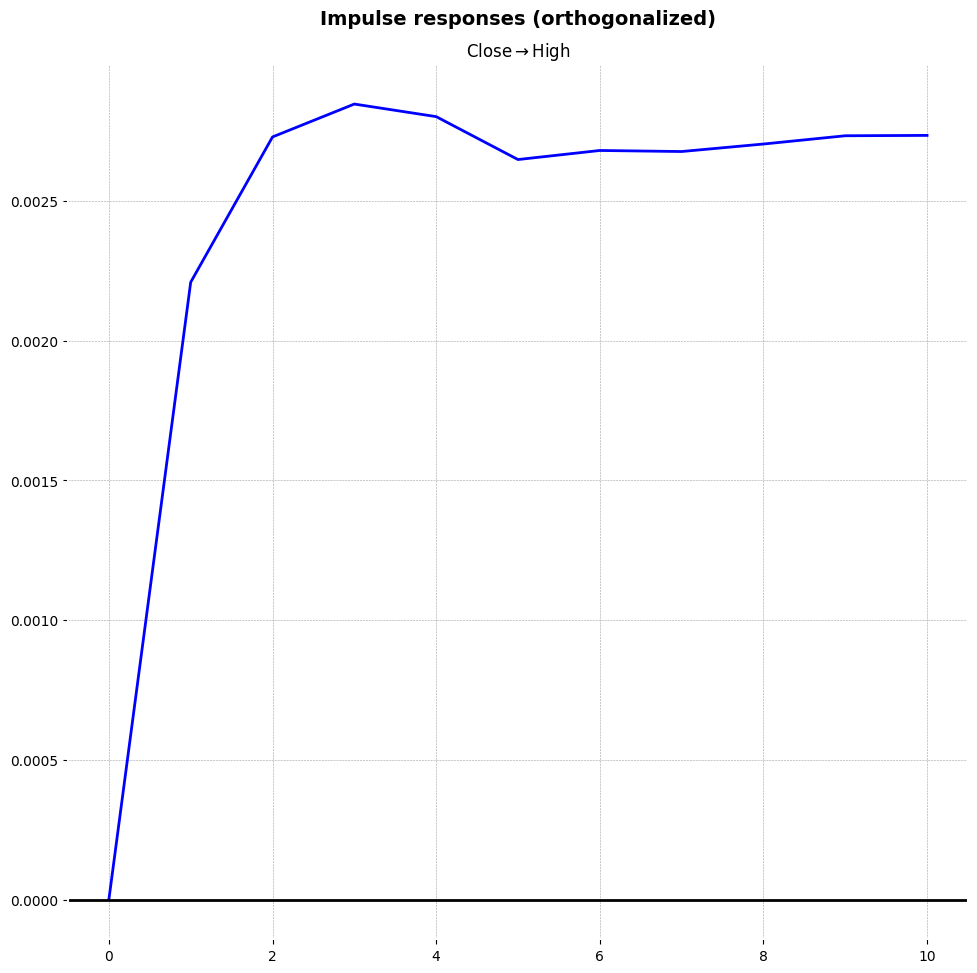

In [590]:
num_periods = 10
ir = vecm_res.irf(periods=num_periods)
plt.clf()
ir.plot(impulse='Close', response='High', orth=True, plot_stderr=False)